In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pickle
import joblib
pd.set_option('display.max_columns', None)

In [2]:
test = pd.read_csv('Blood_samples_dataset_balanced_2(f).csv')

In [4]:
df = pd.read_csv('blood_samples_dataset_test.csv')

In [5]:
d = {}
c = test.columns
for col, new in zip(c, c):
    if " " in col:
        d[col] = col.replace(" ", "_")
test = test.rename(columns=d)
df = df.rename(columns=d)


In [18]:
test = test.rename(columns={"C-reactive_Protein":"C_reactive_Protein"})

In [6]:
dico_disease = {disease: code for code, disease in enumerate(test['Disease'].unique())}

In [7]:
test['label'] = test['Disease'].map(dico_disease)
df['label'] = df['Disease'].map(dico_disease)

In [8]:
X = test.drop(columns=['Disease', 'label'])
y = test['Disease']


In [9]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)


In [10]:
# Algorithme de type Classification de la librairie XGBoost

model = XGBClassifier(objective='binary:logistic', gamma = 0.1, n_estimators=100, learning_rate=0.1,
                    colsample_bytree=0.8, reg_alpha=0.1)
model.fit(X_train, y_train_le)




with open('xgb_streamlit.pkl', 'wb') as f:
    pickle.dump(model, f)
    
model.score(X_test, y_test_le)

1.0

In [11]:
y_pred = model.predict(X_test)

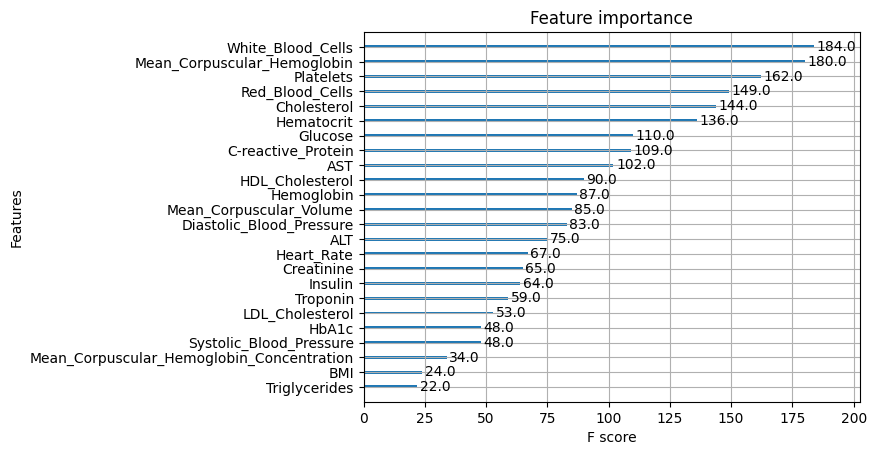

In [32]:
xgb.plot_importance(model);

In [12]:
name = le.inverse_transform(y_test_le)
num = y_test_le
inverse = {n : na for n, na in zip(num, name)}
inverse

{0: 'Anemia', 1: 'Diabetes', 3: 'Thalasse', 2: 'Healthy', 4: 'Thromboc'}

In [26]:
matrice = pd.crosstab(y_test_le, y_pred, rownames=['True'], colnames=['Prediction'])
matrice = matrice.rename(columns=inverse, index = inverse)
matrice

Prediction,Anemia,Diabetes,Healthy,Thalasse,Thromboc
True,,,,,
Anemia,112,0,0,0,0
Diabetes,0,122,0,0,0
Healthy,0,0,116,0,0
Thalasse,0,0,0,89,0
Thromboc,0,0,0,0,32


In [23]:
classification = classification_report(y_test_le, y_pred, output_dict=True)
report = pd.DataFrame(classification).transpose()
report

,precision,recall,f1-score,support
0,1.0,1.0,1.0,112.0
1,1.0,1.0,1.0,122.0
2,1.0,1.0,1.0,116.0
3,1.0,1.0,1.0,89.0
4,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,471.0
weighted avg,1.0,1.0,1.0,471.0


In [17]:
for i in test.columns:
    print(i, " ", "min", test[i].min(), " ", "max", test[i].max())

Glucose   min 0.0109939277897717   max 0.9684602088259044
Cholesterol   min 0.0121393863118908   max 0.9050264233180664
Hemoglobin   min 0.0030213467042421   max 0.9833057855154954
Platelets   min 0.0125937870016239   max 0.9993931296439498
White_Blood_Cells   min 0.0101385075755087   max 0.9907857025235276
Red_Blood_Cells   min 0.0445650783307836   max 1.0
Hematocrit   min 0.0117717230612783   max 0.977520303827566
Mean_Corpuscular_Volume   min 0.04694152724878   max 0.9952629486802982
Mean_Corpuscular_Hemoglobin   min 0.0005536265930272   max 0.9632347734781704
Mean_Corpuscular_Hemoglobin_Concentration   min 0.0069469778792576   max 0.9755856631621392
Insulin   min 0.0341291220877673   max 0.9667836244095532
BMI   min 0.0145956079949449   max 0.8982099499133787
Systolic_Blood_Pressure   min 0.0059882624140756   max 0.8290996337563303
Diastolic_Blood_Pressure   min 0.0055786481969444   max 0.9346174810522196
Triglycerides   min 0.0052169201488685   max 0.9736794050378186
HbA1c   min 0

In [29]:
pred = model.predict(X_test.sample(1))

In [30]:
pred[0]

2